<a href="https://colab.research.google.com/github/thiruragu/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [99]:
attrition_data = attrition_data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'ID'])
from sklearn import preprocessing

string_columns = attrition_data.select_dtypes(include='object') 

for tc in string_columns:
  attrition_data[tc] = preprocessing.LabelEncoder().fit_transform(attrition_data[tc])

attrition_data.info()
attrition_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1028 non-null   int64
 1   Attrition                 1028 non-null   int64
 2   BusinessTravel            1028 non-null   int64
 3   DailyRate                 1028 non-null   int64
 4   Department                1028 non-null   int64
 5   DistanceFromHome          1028 non-null   int64
 6   Education                 1028 non-null   int64
 7   EducationField            1028 non-null   int64
 8   EnvironmentSatisfaction   1028 non-null   int64
 9   Gender                    1028 non-null   int64
 10  HourlyRate                1028 non-null   int64
 11  JobInvolvement            1028 non-null   int64
 12  JobLevel                  1028 non-null   int64
 13  JobRole                   1028 non-null   int64
 14  JobSatisfaction           1028 non-null 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,1.609922,806.551556,1.265564,9.010700,2.873541,2.240272,2.719844,0.580739,65.451362,2.731518,2.093385,4.491245,2.757782,1.107004,6632.573930,14243.531128,2.697471,0.293774,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051
std,9.444297,0.373439,0.660898,407.043735,0.515109,8.078418,1.032840,1.318601,1.089614,0.493678,20.274229,0.703240,1.141854,2.414844,1.105306,0.739898,4855.747841,7048.768076,2.527534,0.455712,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2886.000000,8259.750000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,813.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,65.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4907.500000,14074.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.250000,2.000000,13.000000,4.000000,3.000000,4.000000,1.000000,83.000000,3.000000,3.000000,7.000000,4.000000,2.000000,8729.500000,20342.250000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [100]:
print(attrition_data.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


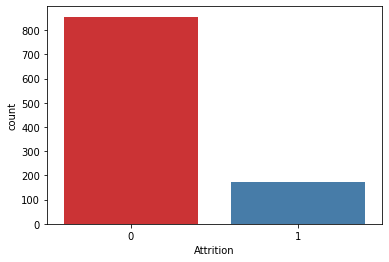

In [101]:
sns.countplot(attrition_data['Attrition'], palette='Set1')
plt.show()

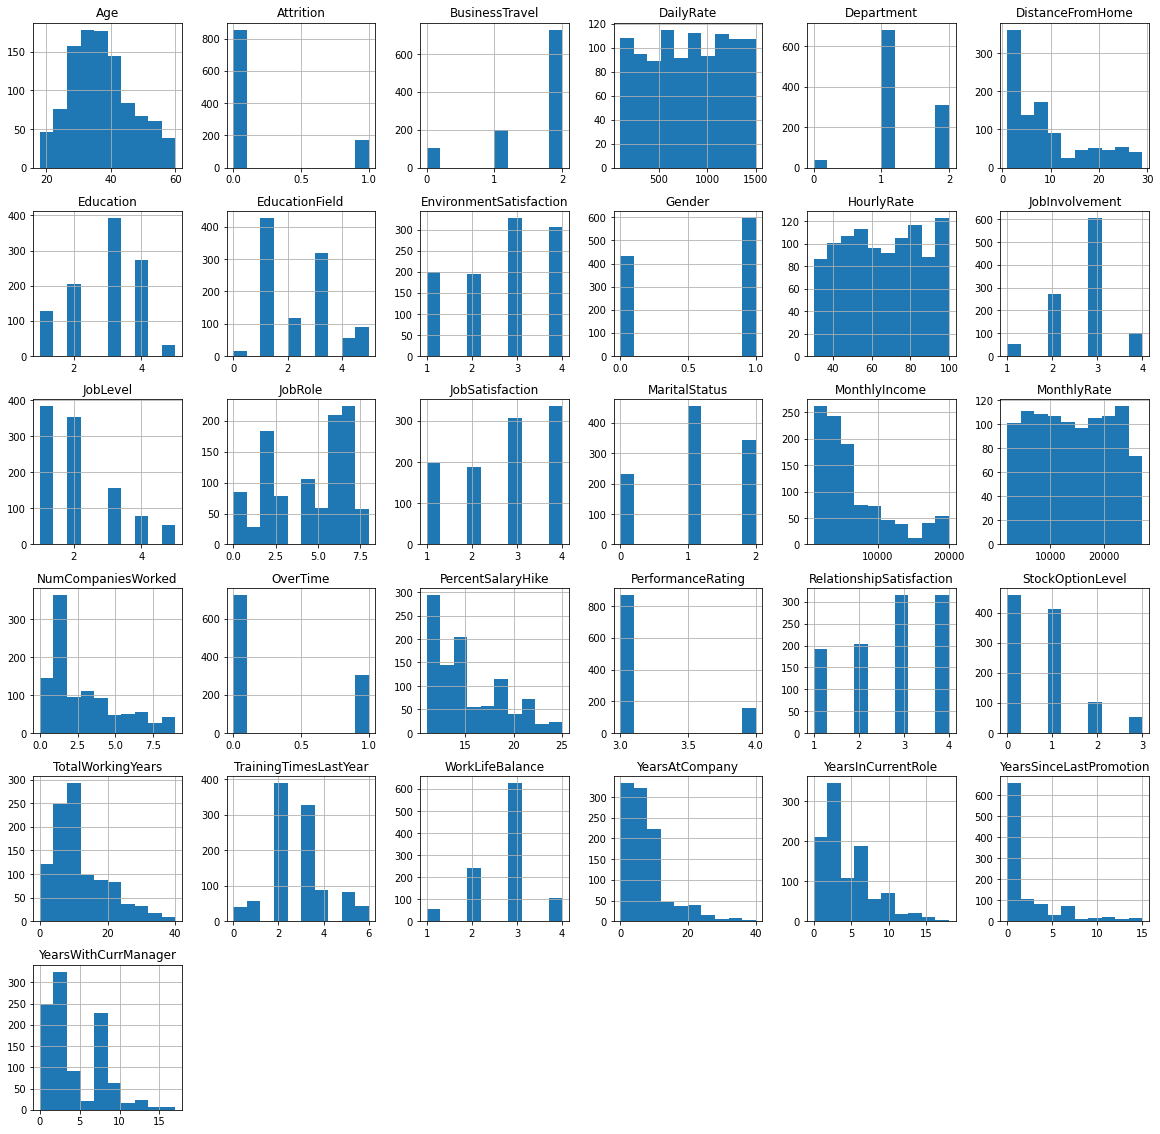

In [102]:
attrition_data.hist(figsize=(20,20))
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
y = attrition_data['Attrition']
x = attrition_data.drop(columns='Attrition')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

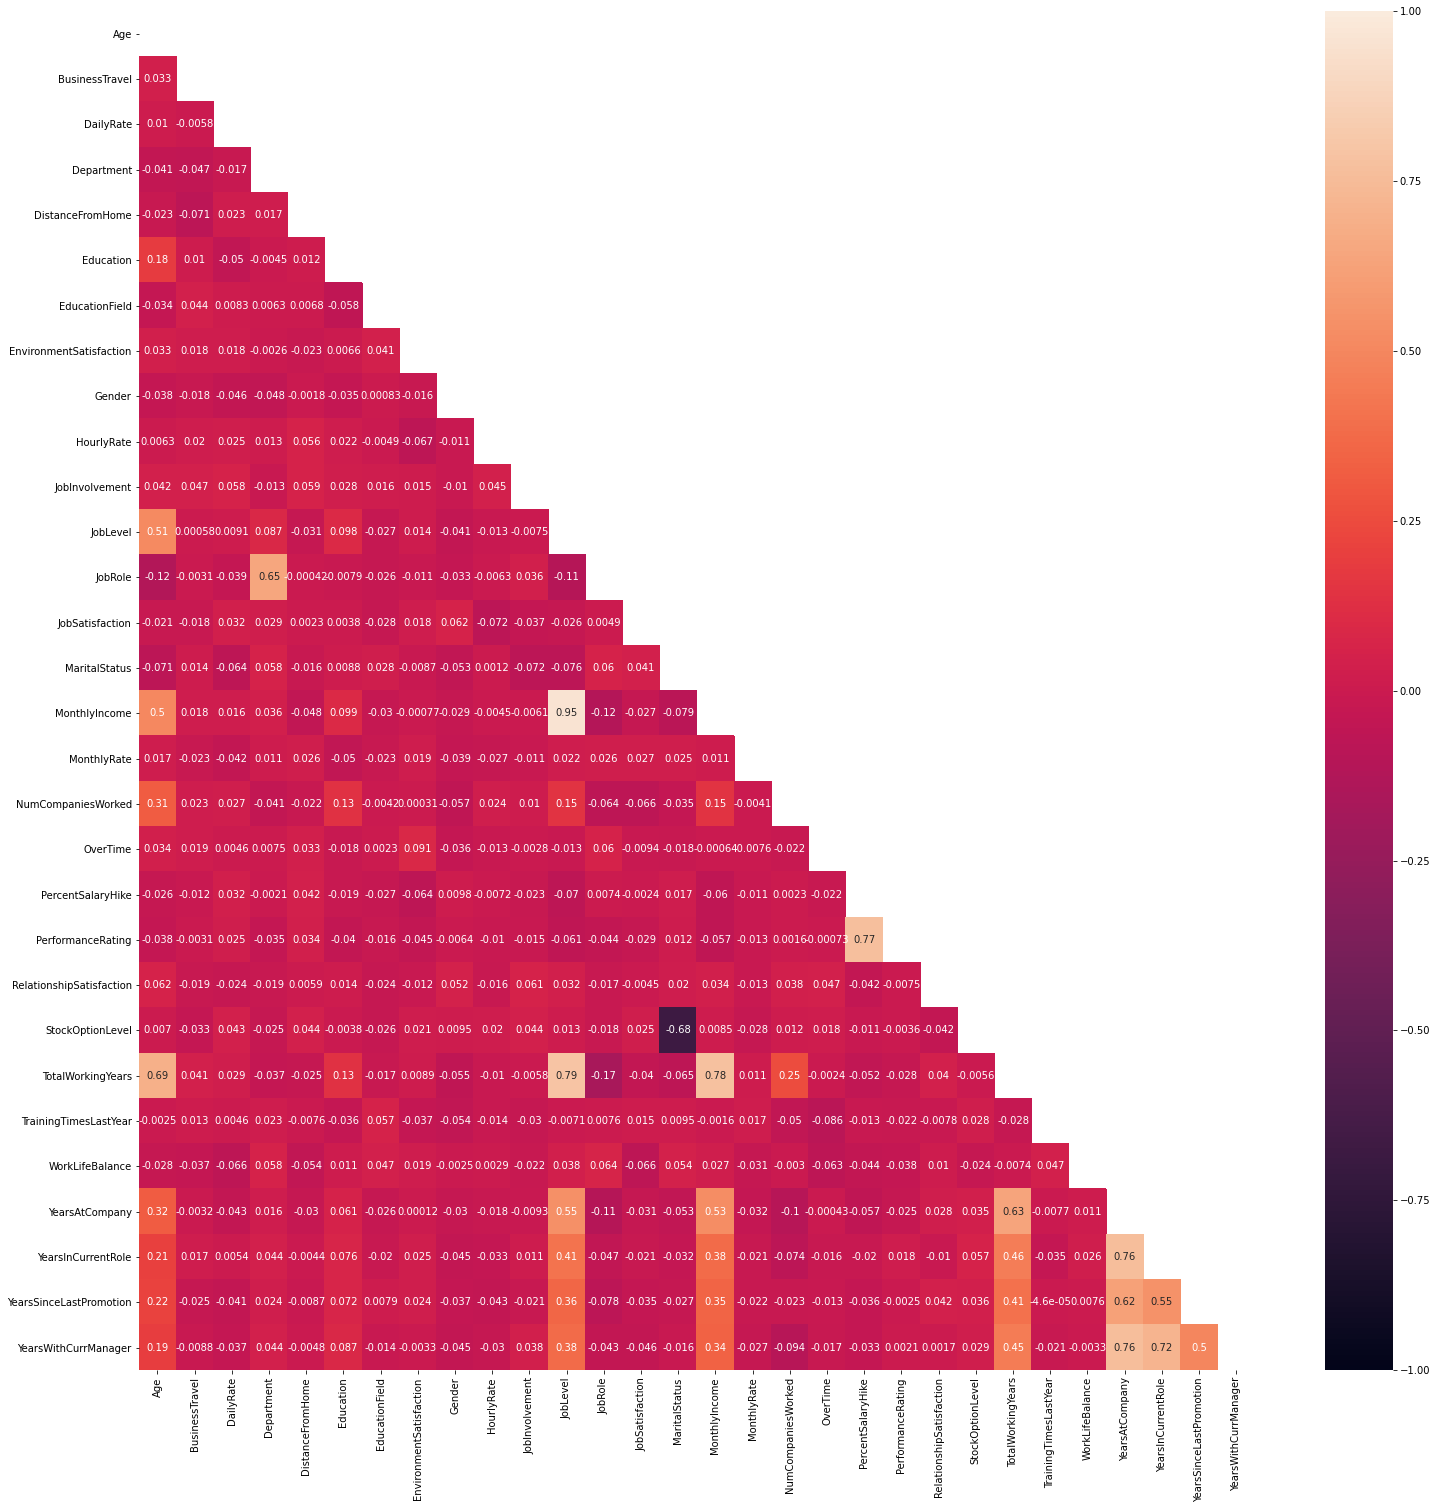

In [106]:
# Visualizing the correlation matrix 
plt.figure(figsize=(25,25))
mask = np.zeros_like(x.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(x.corr(), vmin = -1, annot=True, mask=mask)


------------------------------------------------------------------------------------
Used Classifier is " DecisionTreeClassifier "


Classification Report:-
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.21      0.21      0.21        29

    accuracy                           0.78       206
   macro avg       0.54      0.54      0.54       206
weighted avg       0.78      0.78      0.78       206

Accuracy is  77.67 %


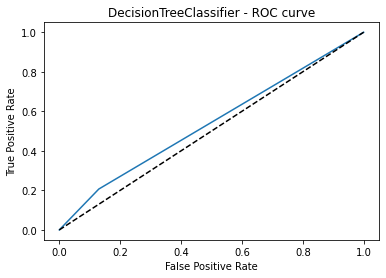


------------------------------------------------------------------------------------
Used Classifier is " RandomForestClassifier "


Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.67      0.14      0.23        29

    accuracy                           0.87       206
   macro avg       0.77      0.56      0.58       206
weighted avg       0.85      0.87      0.83       206

Accuracy is  86.89 %


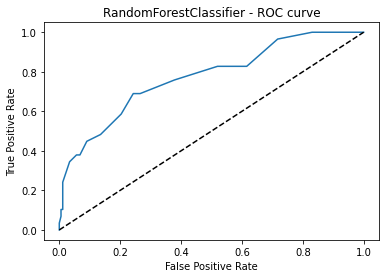


------------------------------------------------------------------------------------
Used Classifier is " ExtraTreesClassifier "


Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.83      0.17      0.29        29

    accuracy                           0.88       206
   macro avg       0.86      0.58      0.61       206
weighted avg       0.87      0.88      0.84       206

Accuracy is  87.86 %


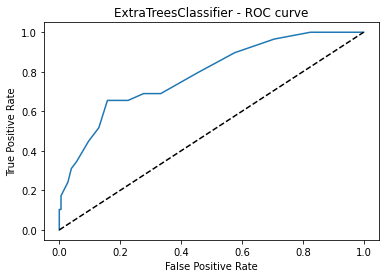


------------------------------------------------------------------------------------
Used Classifier is " AdaBoostClassifier "


Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       177
           1       0.29      0.24      0.26        29

    accuracy                           0.81       206
   macro avg       0.59      0.57      0.58       206
weighted avg       0.80      0.81      0.80       206

Accuracy is  81.07 %


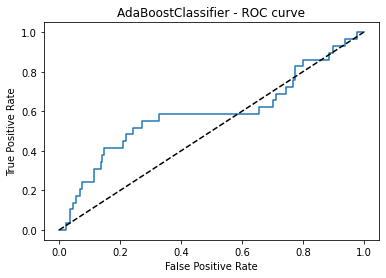


Max Accuracy is " 87.86 " By the Classifier named " ExtraTreesClassifier "


In [105]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, classification_report, accuracy_score

no_estimators = 30
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=no_estimators),
          ExtraTreesClassifier(n_estimators=no_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=no_estimators)]
max_accuracy = 0
max_accuracy_classifier = 0

for model in models:
  cf_name = model.__class__.__name__
  print('\n------------------------------------------------------------------------------------\nUsed Classifier is "',cf_name,'"\n')
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("\nClassification Report:-\n",classification_report(y_test,y_pred.round()))
  current_accuracy = accuracy_score(y_test,y_pred.round())

  if max_accuracy < current_accuracy:
    max_accuracy = current_accuracy
    max_accuracy_classifier = model

  print('Accuracy is ',np.round(current_accuracy*100, 2), '%')

  probs = model.predict_proba(X_test)  
  probs = probs[:, 1]  
  fper, tper, thresholds = roc_curve(y_test, probs) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(cf_name + ' - ROC curve')
  # show the plot
  plt.show()

print('\nMax Accuracy is "',np.round(max_accuracy*100, 2),'" By the Classifier named "',max_accuracy_classifier.__class__.__name__,'"')